<a href="https://colab.research.google.com/github/hildj/lab_eda/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [4]:
!git clone https://github.com/hildj/lab_eda.git

Cloning into 'lab_eda'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 2.64 MiB | 15.47 MiB/s, done.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
var_list = ['occ', 'evwork']  # father occupation & ever worked
output_filename = 'selected_gss_data.csv'
phase = 0

for k in range(3):
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    print("Processing:", url)

    df = pd.read_parquet(url)

    if phase == 0:
        df.loc[:, var_list].to_csv(output_filename, mode='w', header=var_list, index=False)
        phase = 1
    else:
        df.loc[:, var_list].to_csv(output_filename, mode='a', header=None, index=False)


Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet
Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet


In [19]:
data = pd.read_csv('selected_gss_data.csv')
data.head()


,occ,evwork
0,205.0,NaN
1,441.0,yes
2,270.0,NaN
3,1.0,NaN
4,385.0,yes


In [20]:

occ_map = {
    1:'Professional',
    2:'Managerial',
    3:'Skilled',
    4:'Unskilled',
    5:'Other'
}
data['occ'] = data['occ'].map(occ_map)

data['evwork'] = data['evwork'].replace({1:'Yes', 2:'No'})

data.isna().sum()


,0
occ,71980
evwork,46944


In [21]:

# Frequencies for categorical variables
print(data['occ'].value_counts())
print(data['evwork'].value_counts())

ct = pd.crosstab(data['occ'], data['evwork'], normalize='index') * 100
print(ct)


occ
Professional    228
Skilled          73
Unskilled        50
Other            30
Managerial       29
Name: count, dtype: int64
evwork
yes    21788
no      3658
Name: count, dtype: int64
evwork          yes
occ                
Managerial    100.0
Other         100.0
Professional  100.0
Skilled       100.0
Unskilled     100.0


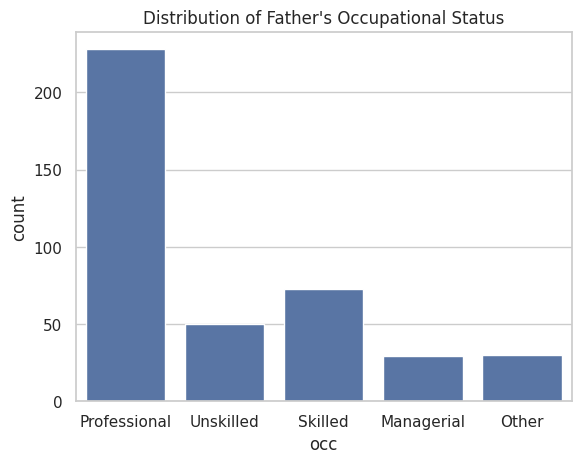

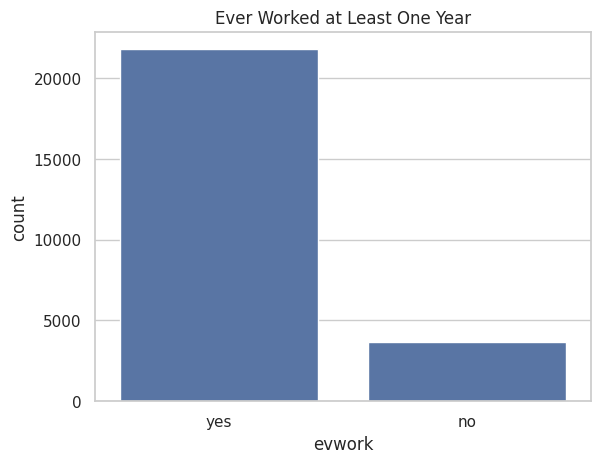

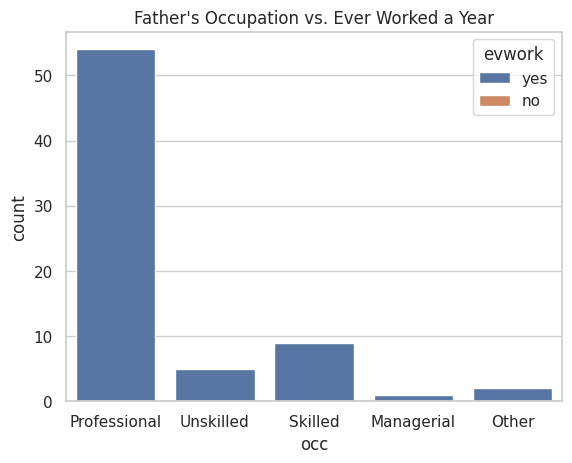

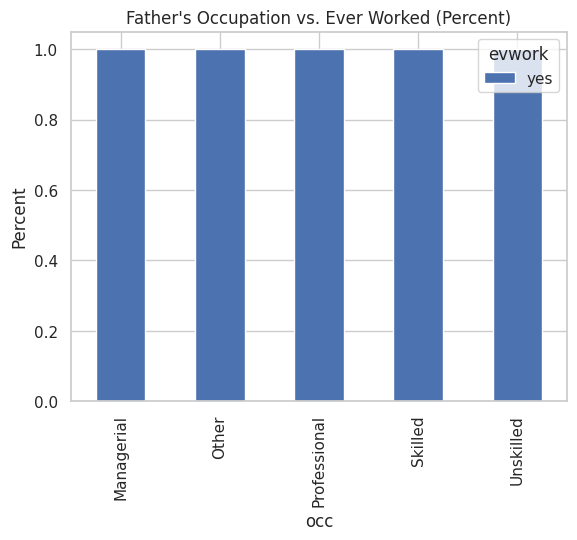

In [22]:

# Distribution of father's occupation
sns.countplot(x='occ', data=data)
plt.title("Distribution of Father's Occupational Status")
plt.show()

# Distribution of ever worked
sns.countplot(x='evwork', data=data)
plt.title("Ever Worked at Least One Year")
plt.show()

sns.countplot(x='occ', hue='evwork', data=data)
plt.title("Father's Occupation vs. Ever Worked a Year")
plt.show()

ct_plot = pd.crosstab(data['occ'], data['evwork'], normalize='index')
ct_plot.plot(kind='bar', stacked=True)
plt.title("Father's Occupation vs. Ever Worked (Percent)")
plt.ylabel("Percent")
plt.show()


In [23]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(data['occ'], data['evwork'])
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square test p-value:", p)


Chi-square test p-value: 1.0
